## Part 1. Application

### 0. Importing libraries

In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score

### 1. Loading the Advertising.csv dataset using pandas

In [2]:
df = pd.read_csv("Advertising.csv", index_col = 0)
df

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


### 2. Standardizing each column of the dataset

In [3]:
norm_df = (df-df.mean())/df.std()
norm_df

,TV,Radio,Newspaper,Sales
1,0.967425,0.979066,1.774493,1.548168
2,-1.194379,1.080097,0.667903,-0.694304
3,-1.512360,1.524637,1.779084,-0.905135
4,0.051919,1.214806,1.283185,0.858177
5,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
196,-1.267759,-1.317724,-0.769287,-1.230964
197,-0.615491,-1.236899,-1.031011,-0.828469
198,0.348934,-0.940539,-1.109069,-0.234310
199,1.590574,1.261955,1.636743,2.199827


### 3. Adding an extra column composing of all ones to X

In [4]:
x = norm_df.drop("Sales", axis = 1)
x.insert(0, 'Bias', [1]*len(x))
x

,Bias,TV,Radio,Newspaper
1,1,0.967425,0.979066,1.774493
2,1,-1.194379,1.080097,0.667903
3,1,-1.512360,1.524637,1.779084
4,1,0.051919,1.214806,1.283185
5,1,0.393196,-0.839507,1.278593
...,...,...,...,...
196,1,-1.267759,-1.317724,-0.769287
197,1,-0.615491,-1.236899,-1.031011
198,1,0.348934,-0.940539,-1.109069
199,1,1.590574,1.261955,1.636743


In [5]:
y = norm_df["Sales"]
y

1      1.548168
2     -0.694304
3     -0.905135
4      0.858177
5     -0.215143
         ...   
196   -1.230964
197   -0.828469
198   -0.234310
199    2.199827
200   -0.119311
Name: Sales, Length: 200, dtype: float64

### 4. Divide the dataset into training and testing, with 0.75 and 0.25 ratio, respectively.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)
# x_train

### 5. Fit the model on the training set

#### 5.1 initialize_weights

In [6]:
def initialize_weights():
    np.random.seed(8)
    init_w = np.random.uniform(0, 1, size = 4)
    return init_w

weights = initialize_weights()
print(weights)

[0.8734294  0.96854066 0.86919454 0.53085569]


#### 5.2 predict

In [10]:
def predict(x, weights):
    predicted = np.dot(x, weights)
    return predicted
    
weights = initialize_weights()
y_hat = predict(x_train, weights)
print(pd.DataFrame(y_hat))

            0
0    1.570882
1   -0.264696
2    1.896971
3    0.706624
4   -1.622646
..        ...
145 -1.242161
146  2.457737
147  2.963164
148 -0.009504
149  1.381803

[150 rows x 1 columns]


#### 5.3 compute_cost

In [11]:
def compute_cost(y, y_hat):
    cost = (np.sum((y_hat - y)**2))/(2*len(y))
    return cost

print(compute_cost(y_train, y_hat))

0.7177310548049948


#### 5.4 compute_gradient

In [12]:
def compute_gradient(y_hat, y, x):
    predictors = ['Bias', 'TV', 'Radio', 'Newspaper']
    w = np.zeros((4,))
    for i in range(len(predictors)):
        w[i] = (np.sum(np.dot((y_hat - y), x[predictors[i]])))/(len(x[predictors[i]]))
    return w

gradients = compute_gradient(y_hat, y_train, x_train)
print(np.shape(gradients))
print(gradients)

(4,)
[0.89740251 0.29905896 0.53700875 0.58516013]


#### 5.5 update_weights

In [13]:
def update_weights(weights, gradients, a):
    for i in range(len(gradients)):
        weights[i] = weights[i] - a*gradients[i]
    return weights

updated_weights = update_weights(weights, gradients, 0.01)
print(np.shape(updated_weights))
print(updated_weights)

(4,)
[0.86445538 0.96555007 0.86382445 0.52500409]


#### 5.6 grad_descent

In [238]:
def grad_descent(num_iter, y, x, a):
    
    weights = initialize_weights()
    
    costs_per_iter = np.zeros((num_iter,))
    weights_per_iter = np.zeros((num_iter, 4))
    r2 = np.zeros((num_iter,))
    
    for i in range(0, num_iter):
        
        weights_per_iter[i] = weights
        
        y_hat = predict(x, weights)
        
        r2[i] = r2_score(y_hat, y) # added for the questions part of the prob set
        
        costs_per_iter[i] = compute_cost(y, y_hat)
        
        gradients = compute_gradient(y_hat, y, x)
        
        weights = update_weights(weights, gradients, a)
        
    return costs_per_iter, weights_per_iter, r2

Using grad_descent

The cost and weight matrices are shown.

In [274]:
num_iter = 800
a = 0.01

# train set
costs_train, weights_train, r2_train = grad_descent(num_iter, y_train, x_train, a)

print("These are the costs (training): ")
costs_train_df = pd.DataFrame(costs_train)
costs_train_df.rename(columns = {0:'costs'}, inplace = True)
print(costs_train_df)

print()

print("These are the weights (training): ")
weights_train_df = pd.DataFrame(weights_train)
weights_train_df.rename(columns = {0:'θ0',
                             1:'θ1',
                             2:'θ2',
                             3:'θ3'}, inplace = True)
print(weights_train_df)

print()

# test set
costs_test, weights_test, r2_test = grad_descent(num_iter, y_test, x_test, a)

print("These are the costs (testing): ")
costs_test_df = pd.DataFrame(costs_test)
costs_test_df.rename(columns = {0:'costs'}, inplace = True)
print(costs_test_df)

print()

print("These are the weights (testing): ")
weights_test_df = pd.DataFrame(weights_test)
weights_test_df.rename(columns = {0:'θ0',
                             1:'θ1',
                             2:'θ2',
                             3:'θ3'}, inplace = True)
print(weights_test_df)

These are the costs (training): 
        costs
0    0.717731
1    0.702565
2    0.687751
3    0.673282
4    0.659149
..        ...
795  0.050841
796  0.050841
797  0.050841
798  0.050841
799  0.050841

[800 rows x 1 columns]

These are the weights (training): 
           θ0        θ1        θ2        θ3
0    0.873429  0.968541  0.869195  0.530856
1    0.864455  0.965550  0.863824  0.525004
2    0.855574  0.962598  0.858532  0.519225
3    0.846784  0.959685  0.853316  0.513517
4    0.838084  0.956809  0.848176  0.507879
..        ...       ...       ...       ...
795 -0.005590  0.747582  0.543509  0.012229
796 -0.005593  0.747583  0.543517  0.012221
797 -0.005596  0.747583  0.543524  0.012212
798 -0.005600  0.747584  0.543532  0.012203
799 -0.005603  0.747584  0.543539  0.012194

[800 rows x 4 columns]

These are the costs (testing): 
        costs
0    0.752373
1    0.735220
2    0.718508
3    0.702224
4    0.686357
..        ...
795  0.049451
796  0.049451
797  0.049451
798  0.049451


#### 5.7 plot_costs

Text(0, 0.5, 'Cost')

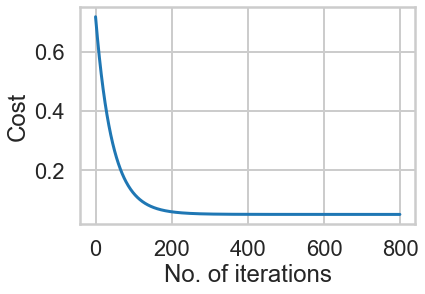

In [242]:
plt.plot(costs_train_df)
plt.xlabel("No. of iterations")
plt.ylabel("Cost")

## Part 2. Questions

Scatter plot of y_hat and y

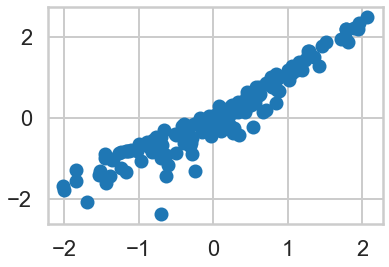

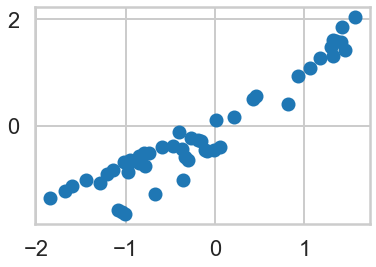

In [223]:
weights = [-0.0058, 0.7476, 0.5441, 0.0115]

# train set
y_hat_train = predict(x_train, weights)
plt.scatter(y_hat_train, y_train)
plt.show()

# test set
y_hat_test = predict(x_test, weights)
plt.scatter(y_hat_test, y_test)
plt.show()

r2 scores

In [225]:
r2_score(y_hat_train, y_train)

0.8846634083526498

In [226]:
r2_score(y_hat_test, y_test)

0.8842428941776628

Plotting r2 and cost as the number of iterations increases

r2 and cost when iteration is 800

In [258]:
num_iter = 800
a = 0.01
costs_train, weights_train, r2_train = grad_descent(num_iter, y_train, x_train, a)

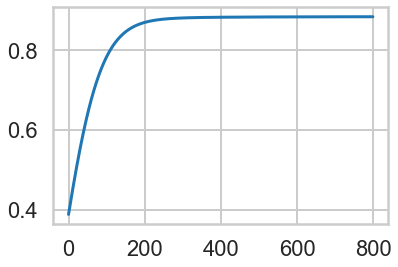

In [259]:
plt.plot(r2_train)

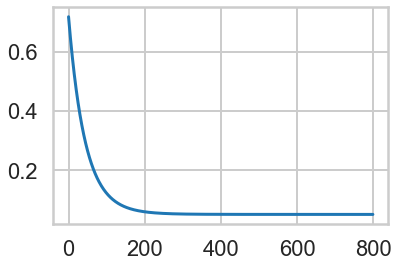

In [260]:
plt.plot(costs_train)

r2 and cost when iteration is 1000

In [261]:
num_iter = 1000
a = 0.01
costs_train, weights_train, r2_train = grad_descent(num_iter, y_train, x_train, a)

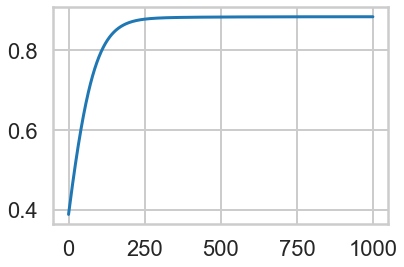

In [262]:
plt.plot(r2_train)

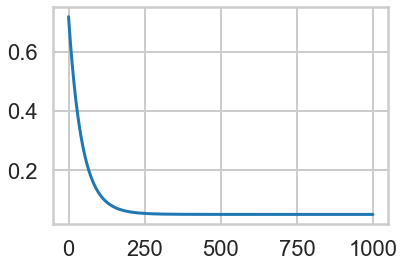

In [263]:
plt.plot(costs_train)

r2 and cost when iteration is 2000

In [267]:
num_iter = 2000
a = 0.01
costs_train, weights_train, r2_train = grad_descent(num_iter, y_train, x_train, a)

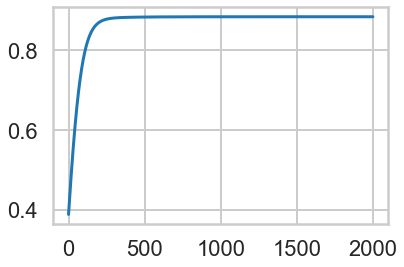

In [268]:
plt.plot(r2_train)

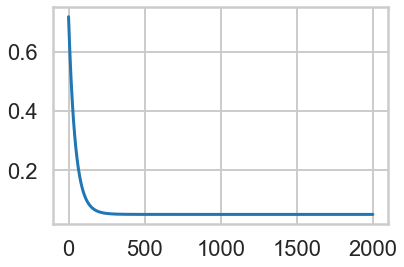

In [269]:
plt.plot(costs_train)

Visualizing the cost function of each learning rate

In [320]:
num_iter = 1000
costs_1, weights_1, r2_1 = grad_descent(num_iter, y_train, x_train, 0.1)
costs_01, weights_01, r2_01 = grad_descent(num_iter, y_train, x_train, 0.01)
costs_001, weights_001, r2_001 = grad_descent(num_iter, y_train, x_train, 0.001)
costs_0001, weights_0001, r2_0001 = grad_descent(num_iter, y_train, x_train, 0.0001)
costs_2, weights_2, r2_2 = grad_descent(num_iter, y_train, x_train, 0.2)

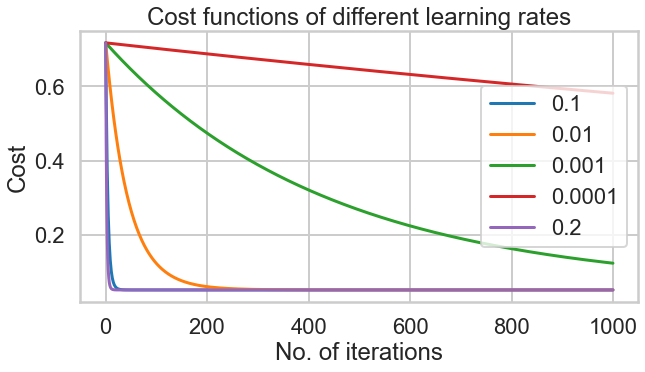

In [319]:
plt.figure(figsize=(10, 5))

plt.plot(costs_1, label = '0.1')
plt.plot(costs_01, label = '0.01')
plt.plot(costs_001, label = '0.001')
plt.plot(costs_0001, label = '0.0001')
plt.plot(costs_2, label = '0.2')

plt.title("Cost functions of different learning rates")
plt.xlabel("No. of iterations")
plt.ylabel("Cost")

plt.legend()
plt.show()